In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

json_path = os.path.abspath('Data/adjusted_basepairing .json')

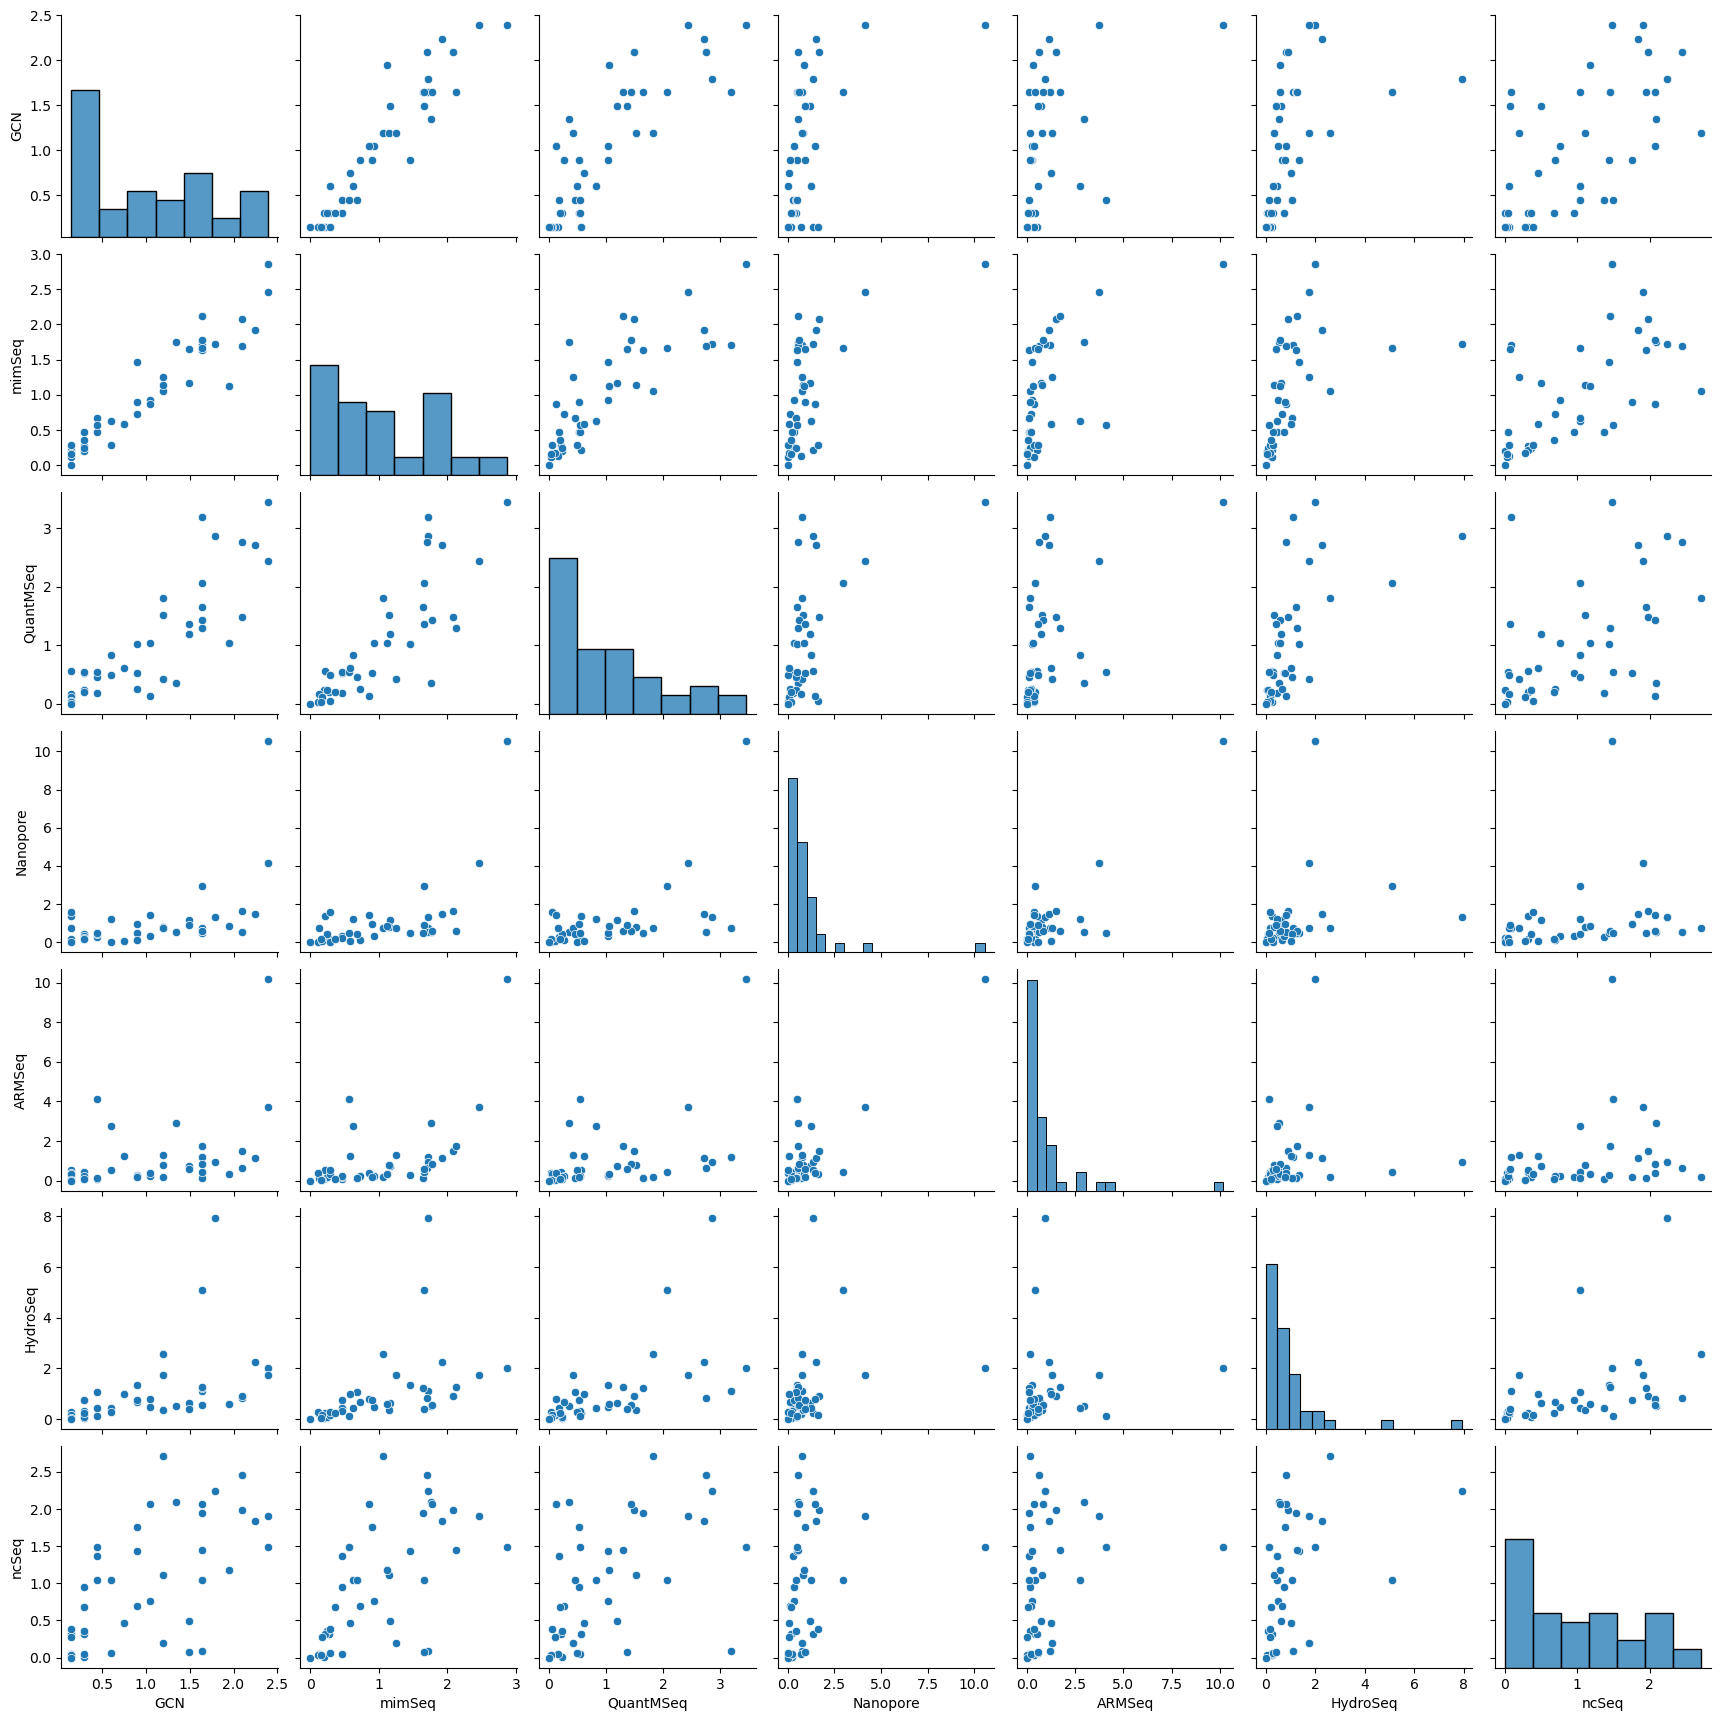

In [2]:
filenames = os.listdir('Data/tRNA data/')
filenames = [filename for filename in filenames if filename[0] != '.']
filenames = [filename for filename in filenames if filename[0] != 'c']

tRNA_data = pd.read_csv('Data/tRNA data/' + filenames[0])
new_name_0 = filenames[0].split('_')[1]
colnames = list(tRNA_data.columns[:-1])
colnames.append(new_name_0)
tRNA_data.columns = colnames
for filename in filenames:
    new_data = pd.read_csv('Data/tRNA data/' + filename)
    new_name = filename.split('_')[1]
    if new_name != new_name_0:
        new_colnames = list(new_data.columns[:-1])
        new_colnames.append(new_name)
        new_data.columns = new_colnames
        tRNA_data = tRNA_data.merge(new_data[['anticodon.dna',new_name]],on='anticodon.dna')  

plot_data = pd.DataFrame(tRNA_data['anticodon.dna'])
for colname in tRNA_data.columns[3:]:
    col_max = np.mean(tRNA_data[colname])
    plot_data[colname] = tRNA_data[colname] / col_max
plot_data = plot_data[['anticodon.dna','GCN','mimSeq','QuantMSeq','Nanopore','ARMSeq','HydroSeq','ncSeq']]


plot_data = plot_data.set_index('anticodon.dna')
plot = sns.pairplot(plot_data)
#plot.savefig('Figure files/Supp fig pairwise tRNA data.png')
plt.show()